<a href="https://colab.research.google.com/github/bhenderson11/Recruitment-Bias-in-Machine-Learning-Algorithms-/blob/main/Recruitment_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Dataset

In [7]:
 !pip install --upgrade scikit-optimize


In [8]:
# try:
#     # Check if notebook is running in Google Colab
#     import google.colab
#     # Get additional files from Github
#     !wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/bayesian_optimization_util.py
#     # Install additional dependencies
#     !pip install scikit-optimize==0.5.2
#     !pip install GPy==1.9.8
#     !pip install GPyOpt==1.2.1
#     !pip install xgboost==0.90
# except:
#     pass


In [9]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer, mean_squared_error
import sklearn.metrics
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from functools import partial
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.svm import SVR
from tabulate import tabulate
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from sklearn.metrics import confusion_matrix, classification_report
!pip install shap

import shap


In [10]:
!pip install fairlearn

import lightgbm as lgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import (
    count,
    selection_rate,
    equalized_odds_difference,
    false_positive_rate,
    false_negative_rate,
)
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import EqualizedOdds
from sklearn.model_selection import train_test_split
import warnings

warnings.simplefilter("ignore")

In [11]:
#!pip install scikit-optimize scikit-learn==0.20.3

In [13]:
uploaded = files.upload()


Saving recruitment data.csv to recruitment data.csv


In [14]:
rcm = pd.read_csv(next(iter(uploaded.keys())))

Some Exploration of Dataset

In [15]:
rcm.head(10)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932,C++;Python,2,0
5,5,<35,No,Master,1,Man,No,Dev,9,2,France,38915,JavaScript;Python;Docker;Git;MySQL,5,0
6,6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319,C++;Python;Docker;Git,4,0
8,8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,Python;Git;PostgreSQL,3,0
9,9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [16]:
rcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      73462 non-null  int64 
 1   Age             73462 non-null  object
 2   Accessibility   73462 non-null  object
 3   EdLevel         73462 non-null  object
 4   Employment      73462 non-null  int64 
 5   Gender          73462 non-null  object
 6   MentalHealth    73462 non-null  object
 7   MainBranch      73462 non-null  object
 8   YearsCode       73462 non-null  int64 
 9   YearsCodePro    73462 non-null  int64 
 10  Country         73462 non-null  object
 11  PreviousSalary  73462 non-null  int64 
 12  HaveWorkedWith  73399 non-null  object
 13  ComputerSkills  73462 non-null  int64 
 14  Employed        73462 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 8.4+ MB


In [17]:
rcm.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


In [18]:
rcm = rcm.drop(columns = ['Unnamed: 0'])

In [19]:
#check for nulls and fill with 0
rcm.fillna(0, inplace=True)
rcm.isna().sum()



,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0
Country,0


In [20]:
#Manually encode age column (Under 35 to be 1, over 35 to be 0)
rcm.rename(columns={"Age": "Under 35"}, inplace=True)
rcm['Under 35'] = rcm['Under 35'].apply(lambda x: 1 if x == '<35' else 0)

In [21]:
rcm.head()

,Under 35,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,No,Master,1,Man,No,Dev,7,4,Sweden,51552,C++;Python;Git;PostgreSQL,4,0
1,1,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,No,Master,1,Man,No,Dev,15,6,Germany,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932,C++;Python,2,0


### Preprocess the data for training

In [22]:
#preprocessing pipeline

def create_proc_pipe(X, include_numeric = True):
    """"""

    numeric_features = X_train.select_dtypes(exclude="object").columns.tolist()
    if include_numeric:
      numeric_transformer = Pipeline(steps=
       [
         ("scaler", StandardScaler()),
         #("poly", PolynomialFeatures(degree=2, include_bias=False))
      ]
      ).set_output(transform="pandas")
    else:
      numeric_transformer ="passthrough"

    categoric_features = X_train.select_dtypes(include="object").columns.tolist()
    categorical_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="none")),
        ("cat", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1))

    ]).set_output(transform = "pandas")

    preprocessor = ColumnTransformer([
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categoric_features)

    ], remainder="passthrough",verbose_feature_names_out = False).set_output(transform = "pandas")
    return preprocessor

In [23]:
#Use a random sample
rcm = rcm.sample(n=10000, random_state = 42)
#split the data
X = rcm.drop(["Employed","HaveWorkedWith"], axis = 1 )
y= rcm["Employed"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
#apply preprocessor to the data
preprocessor = create_proc_pipe(X_train, include_numeric = False)
preprocessor.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', 'passthrough',
                                 ['Under 35', 'Employment', 'YearsCode',
                                  'YearsCodePro', 'PreviousSalary',
                                  'ComputerSkills']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='none',
                                                                strategy='constant')),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Accessibility', 'EdLevel', 'Gender',
                                  'MentalHealth', 'MainBranch', 'Country'])],
                  verbose_feature_names_out=False)

### Feature Importance

In [25]:
#Using K best
# Create the pipeline
k_best = Pipeline(steps=[
    ("preprocessor", create_proc_pipe(X_train, include_numeric=False)),
    ("k_best", SelectKBest(chi2,k="all"))
]).set_output(transform="pandas")

# Fit the pipeline
k_best.fit(X_train, y_train)

# Transform the data
x_sel = k_best.transform(X)

#Get scores for each feature
feature_scores = k_best.named_steps["k_best"].scores_
feature_pvalues = k_best.named_steps["k_best"].pvalues_

feature_info = pd.DataFrame({
    "Feature": X_train.columns,
    "Score": feature_scores,
    "p-value": feature_pvalues
})

#sort by highest score to lowest
sorted_features = feature_info.sort_values(by= "Score", ascending = False)

sorted_features

,Feature,Score,p-value
4,Gender,23523.433098,0.000000e+00
5,MentalHealth,10047.854422,0.000000e+00
10,PreviousSalary,90.858423,1.543286e-21
11,ComputerSkills,42.112419,8.617420e-11
7,YearsCode,35.521512,2.522493e-09
3,Employment,21.177540,4.186420e-06
8,YearsCodePro,14.649874,1.294433e-04
2,EdLevel,10.040175,1.531627e-03
6,MainBranch,3.176431,7.470776e-02
9,Country,1.892317,1.689408e-01


### Looking at some different models


In [68]:
#Use a random forest regressor
rfp = Pipeline(steps= [
    ('preprocessor', create_proc_pipe(X_train)),
    ('rfr', RandomForestRegressor(max_depth = 13))
]).set_output(transform = "pandas")

rfp.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('rfr', RandomForestRegressor(max_depth=13))])

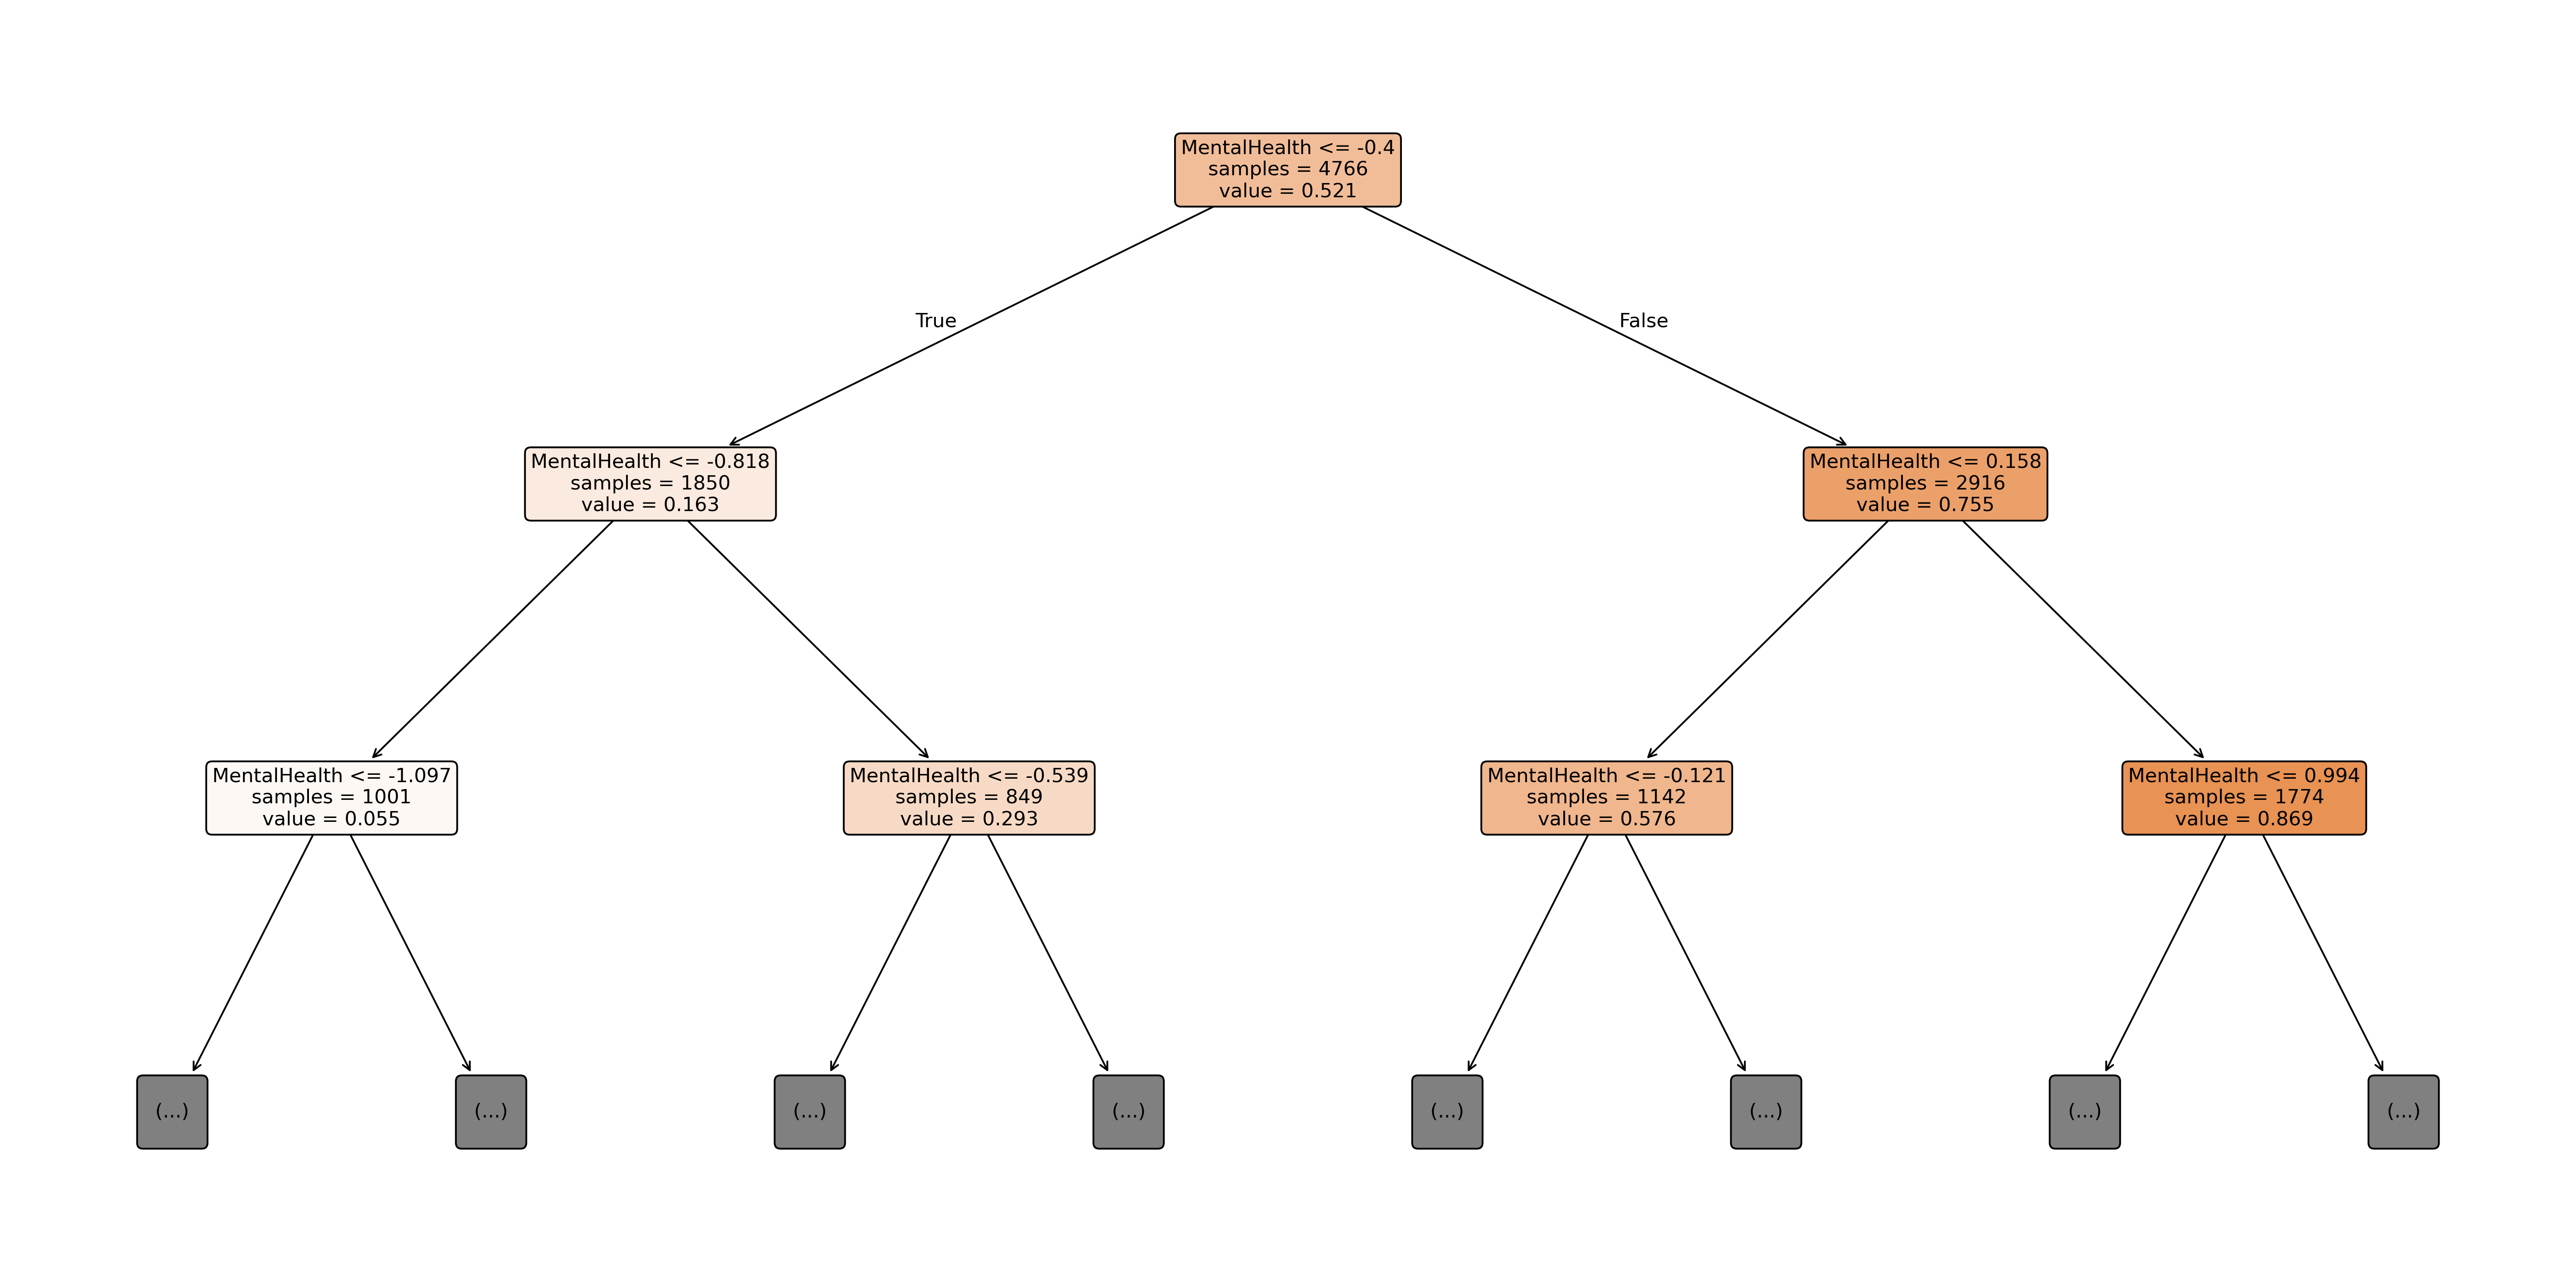

In [27]:
from operator import invert

from sklearn.tree import plot_tree
import matplotlib.transforms as transforms

tree_index = 0
tree_model = rfp["rfr"].estimators_[tree_index]

fn = X_train.columns

fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

tree.plot_tree(tree_model,
          feature_names=fn,
          filled=True,
          rounded=True,
          impurity=False,
          ax=ax,
          max_depth=2
)

plt.tight_layout()
plt.show()


In [28]:
#Take a look at the results for random forest regressor
y_pred = rfp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

score = rfp.score(X_train, y_train)

r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.15409432870442602
R2: 0.38082659716282774
Score: 0.7581326370665377


In [29]:
#Do some cross validation
KFold(n_splits = 5)

KFold(n_splits=5, random_state=None, shuffle=False)

In [52]:
def create_regr_pipe(est, X):

  """ """
  regr_pipe = Pipeline(
      steps = [
      ("pp", create_proc_pipe(X)),
      ("regr", est())
      ]
  ).set_output(transform = "pandas")
  return regr_pipe
gbr = create_regr_pipe(GradientBoostingRegressor, X_train)
gbr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('regr', GradientBoostingRegressor())])

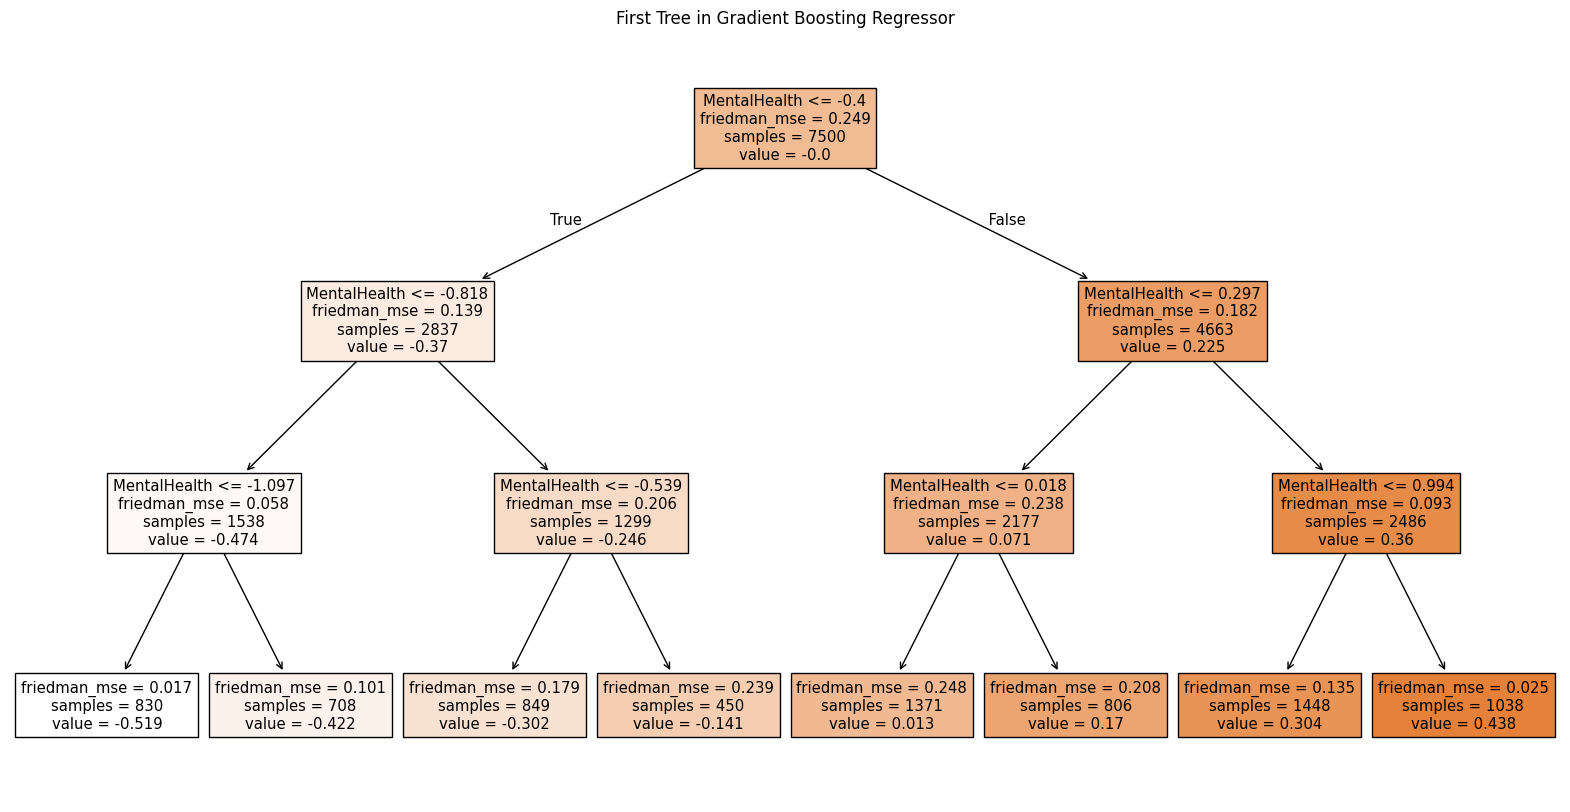

In [53]:
gbr_estimator = gbr.named_steps['regr']

estimators = gbr_estimator.estimators_


first_tree = estimators[0, 0]
feature_names = X_train.columns

plt.figure(figsize=(20, 10))
tree.plot_tree(first_tree, feature_names= feature_names, filled=True)
plt.title("First Tree in Gradient Boosting Regressor")
plt.show()


In [54]:
#take a look at results for GBR
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = gbr.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.14641624240456638
R2: 0.41167826355141046
Score: 0.4644473110767793


In [33]:
#Decision tree classification
clp = Pipeline(steps= [
    ('preprocessor', create_proc_pipe(X_train)),
    ('clf', tree.DecisionTreeClassifier())
]).set_output(transform = "pandas")

clp.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('clf', DecisionTreeClassifier())])

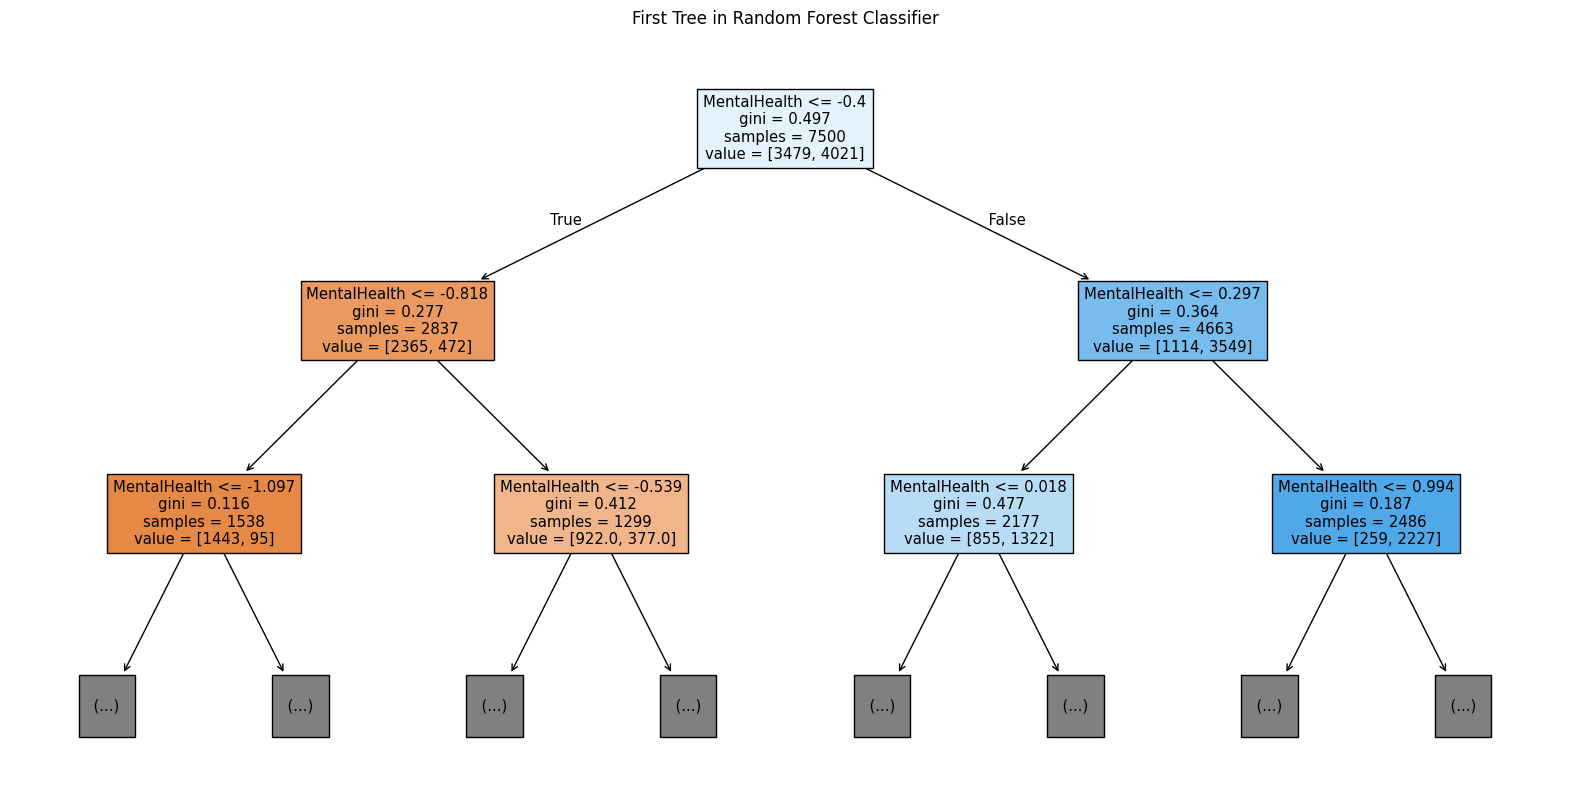

In [34]:
clp_estimator = clp.named_steps['clf']

first_tree = clp_estimator
feature_names = X_train.columns
plt.figure(figsize=(20, 10))
tree.plot_tree(first_tree, feature_names=feature_names, max_depth = 2, filled=True)
plt.title("First Tree in Random Forest Classifier")
plt.show()

In [35]:
#take a look at results for decision tree
y_pred = clp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = clp.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.2792
R2: -0.12186616811662776
Score: 0.9997333333333334


In [36]:
#hist gradient boosting regressor
hgb = create_regr_pipe(HistGradientBoostingRegressor, X_train)
hgb.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('regr', HistGradientBoostingRegressor())])

In [37]:
#take a look at results for HGB regressor
y_pred = hgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = hgb.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.1531534564557935
R2: 0.3846071585677726
Score: 0.5861228858347549


In [38]:
#Support vector regressor
svr = create_regr_pipe(SVR, X_train)
svr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('regr', SVR())])

In [39]:
#take a look at results for SVR
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = svr.score(X_train, y_train)



r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.16371339539461327
R2: 0.34217578953897854
Score: 0.3437167644423529


In [40]:
#Voting Regressor using the two best (RFR and GBR)
vr = VotingRegressor(estimators = [('rfr', rfp), ('gbr', gbr)])
vr.fit(X_train, y_train)


VotingRegressor(estimators=[('rfr',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Under '
                                                                                '35',
                                                                                'Employment',
                                                                                'YearsCode',
                                                                                'YearsCodePro',
                                                                                'PreviousSalary',
                                                                                'ComputerSkills']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='none',
                                                                                                              strategy='constant'...
                                                                                'PreviousSalary',
                                                                                'ComputerSkills']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='none',
                                                                                                              strategy='constant')),
                                                                                               ('cat',
                                                                                                OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                               unknown_value=-1))]),
                                                                               ['Accessibility',
                                                                                'EdLevel',
                                                                                'Gender',
                                                                                'MentalHealth',
                                                                                'MainBranch',
                                                                                'Country'])],
                                                                verbose_feature_names_out=False)),
                                             ('regr',
                                              GradientBoostingRegressor())]))])

In [41]:
#look at results for VR
y_pred = vr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = vr.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.1484291678692623
R2: 0.40359003655362113
Score: 0.6307108358544203


In [42]:

#Use a random forest classifier
rfp = Pipeline(steps= [
    ('preprocessor', create_proc_pipe(X_train)),
    ('rfc', RandomForestClassifier(max_depth = 3, min_samples_split = 10, min_samples_leaf = 10,  n_estimators = 200, bootstrap = True, criterion = "gini" )) # Use RandomForestClassifier
]).set_output(transform = "pandas")

rfp.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('rfc',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=10,
                                        min_samples_split=10,
                                        n_estimators=200))])

In [43]:
y_pred = rfp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = rfp.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.2156
R2: 0.13368787304460972
Score: 0.7908


In [44]:
results = [

            ["Random Forest Regressor",0.15295290173985804,0.3854130165572577,0.7180955503314594],
            ["Gradient Boosting Regressor", 0.14644884697140623,0.4115472536643628, 0.4644473110767793],
            ["Decision tree Classifier", 0.2868,-0.15240407240633536, 0.9997333333333334],
            ["Histogram Boosting Regressor", 0.1531534564557935,0.3846071585677726,0.5861228858347549],
            ["Support Vector Regressor",0.16371339539461327,0.34217578953897854, 0.3437167644423529],
            ["Voting Regressor", 0.1478309121267241, 0.40599391505446303, 0.6069729996801217],
            ["Random Forest Classifier", 0.2168, ]
]
col_names = ["Model", "MSE", "R2", "Score"]
print(tabulate(results, headers = col_names))

Model                              MSE         R2     Score
----------------------------  --------  ---------  --------
Random Forest Regressor       0.152953   0.385413  0.718096
Gradient Boosting Regressor   0.146449   0.411547  0.464447
Decision tree Classifier      0.2868    -0.152404  0.999733
Histogram Boosting Regressor  0.153153   0.384607  0.586123
Support Vector Regressor      0.163713   0.342176  0.343717
Voting Regressor              0.147831   0.405994  0.606973
Random Forest Classifier      0.2168


In [45]:
y_pred = rfp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = rfp.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.2156
R2: 0.13368787304460972
Score: 0.7908


In [46]:
y_pred = rfp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = rfp.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.2156
R2: 0.13368787304460972
Score: 0.7908


### Fine Tune Selected Model

In [55]:
cv_splitter = KFold(n_splits = 5,
                    shuffle = True,
                    )

In [69]:
bayessearch_tree = BayesSearchCV( estimator = rfp,
                                 search_spaces= {
                                     'rfr__max_depth': (1, 10),
                                     'rfr__min_samples_split': (2, 10),
                                     'rfr__min_samples_leaf': (1, 10),
                                     'rfr__n_estimators': (10, 200),
                                     'rfr__bootstrap': (True, False),
                                     'rfr__criterion': ('squared_error', 'absolute_error'),
                                 },
                                  scoring = "neg_root_mean_squared_error",
                                  cv = cv_splitter,
                                  n_iter = 50,
                                  n_jobs = -1

                                  )
bayessearch_tree.fit(X_train, y_train)
bayessearch_results = pd.DataFrame(bayessearch_tree.cv_results_)
bayessearch_results.loc[:,'performance'] = (
    bayessearch_results['std_test_score'] -bayessearch_results['mean_test_score'] )

In [70]:
bayessearch_results.sort_values(by = "mean_test_score", ascending =False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfr__bootstrap,param_rfr__criterion,param_rfr__max_depth,param_rfr__min_samples_leaf,param_rfr__min_samples_split,param_rfr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,performance
25,1.919141,0.273019,0.060946,0.016552,True,squared_error,4,1,2,200,"{'rfr__bootstrap': True, 'rfr__criterion': 'sq...",-0.385914,-0.380170,-0.371121,-0.371703,-0.378632,-0.377508,0.005541,1,0.383049
43,1.340805,0.183616,0.037532,0.006414,True,squared_error,6,10,10,103,"{'rfr__bootstrap': True, 'rfr__criterion': 'sq...",-0.381779,-0.382373,-0.379221,-0.370996,-0.373551,-0.377584,0.004536,2,0.382120
39,2.352911,0.364353,0.074742,0.027036,True,squared_error,4,4,10,200,"{'rfr__bootstrap': True, 'rfr__criterion': 'sq...",-0.364986,-0.374439,-0.396550,-0.377064,-0.375056,-0.377619,0.010344,3,0.387963
2,0.532860,0.076706,0.027813,0.005817,True,squared_error,5,5,7,44,"{'rfr__bootstrap': True, 'rfr__criterion': 'sq...",-0.376380,-0.381145,-0.381415,-0.377586,-0.371866,-0.377679,0.003506,4,0.381185
14,2.676068,0.154310,0.061314,0.002744,True,squared_error,6,10,3,200,"{'rfr__bootstrap': True, 'rfr__criterion': 'sq...",-0.381973,-0.365818,-0.382202,-0.377032,-0.381603,-0.377725,0.006251,5,0.383977


In [ ]:
#random_forest_results = pd.DataFrame(bayessearch_results.sort_values(by = "mean_test_score", ascending =False).head())


In [62]:
bayessearch_tree = BayesSearchCV( estimator = gbr,
                                 search_spaces= {
                                     'regr__max_depth': (1, 10),
                                     'regr__min_samples_split': (2, 10),
                                     'regr__min_samples_leaf': (1, 10),
                                     'regr__n_estimators': (10, 200),
                                     'regr__criterion': ('squared_error', 'friedman_mse'),
                                     'regr__alpha' :(0.01, 0.99)
                                 },
                                  scoring = "neg_root_mean_squared_error",
                                  cv = cv_splitter,
                                  n_iter = 50,
                                  n_jobs = -1

                                  )
bayessearch_tree.fit(X_train, y_train)
bayessearch_results = pd.DataFrame(bayessearch_tree.cv_results_)
bayessearch_results.loc[:,'performance'] = (
    bayessearch_results['std_test_score'] -bayessearch_results['mean_test_score'] )

In [63]:
bayessearch_results.sort_values(by = "mean_test_score", ascending =False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__alpha,param_regr__criterion,param_regr__max_depth,param_regr__min_samples_leaf,param_regr__min_samples_split,param_regr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,performance
46,1.440882,0.512153,0.033405,0.015624,0.010000,squared_error,2,10,10,135,"{'regr__alpha': 0.01, 'regr__criterion': 'squa...",-0.381920,-0.365014,-0.388152,-0.377936,-0.369752,-0.376555,0.008302,1,0.384857
13,0.584307,0.086963,0.022198,0.003894,0.944630,squared_error,2,1,10,78,"{'regr__alpha': 0.9446299614219554, 'regr__cri...",-0.379109,-0.372272,-0.375201,-0.375066,-0.382371,-0.376804,0.003534,2,0.380338
32,0.545177,0.069341,0.021550,0.003750,0.990000,squared_error,3,10,2,52,"{'regr__alpha': 0.99, 'regr__criterion': 'squa...",-0.385907,-0.377624,-0.375237,-0.375948,-0.369451,-0.376833,0.005307,3,0.382140
12,1.399067,0.254839,0.036316,0.010956,0.157311,squared_error,2,9,6,119,"{'regr__alpha': 0.1573110647220906, 'regr__cri...",-0.380409,-0.358025,-0.388763,-0.376305,-0.380859,-0.376872,0.010250,4,0.387122
41,0.767633,0.106040,0.021494,0.003846,0.494981,friedman_mse,1,7,9,187,"{'regr__alpha': 0.4949813822838433, 'regr__cri...",-0.374815,-0.368704,-0.379066,-0.380248,-0.381678,-0.376902,0.004696,5,0.381598


In [71]:
#Use a random forest regressor with the best params
rfp = Pipeline(steps= [
    ('preprocessor', create_proc_pipe(X_train)),
    ('rfr', RandomForestRegressor(max_depth = 3, min_samples_split = 10, min_samples_leaf = 10,  n_estimators = 200, bootstrap = True, criterion = "squared_error" ))
]).set_output(transform = "pandas")

rfp.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('rfr',
                 RandomForestRegressor(max_depth=3, min_samples_leaf=10,
                                       min_samples_split=10,
                                       n_estimators=200))])

In [72]:
#Take a look at the results for new random forest regressor
y_pred = rfp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

score = rfp.score(X_train, y_train)

r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.14699980770710305
R2: 0.4093334133730342
Score: 0.4287912352171188


In [73]:
# #GBR with best params
# def create_regr_pipe(est, X):

#   """ """
#   regr_pipe = Pipeline(
#       steps = [
#       ("pp", create_proc_pipe(X)),
#       ("regr", est())
#       ]
#   ).set_output(transform = "pandas")
#   return regr_pipe
# gbr = create_regr_pipe(GradientBoostingRegressor, X_train)
# gbr.fit(X_train, y_train)

### **Evaluate Fairness of selected models**

*   List item
*   List item



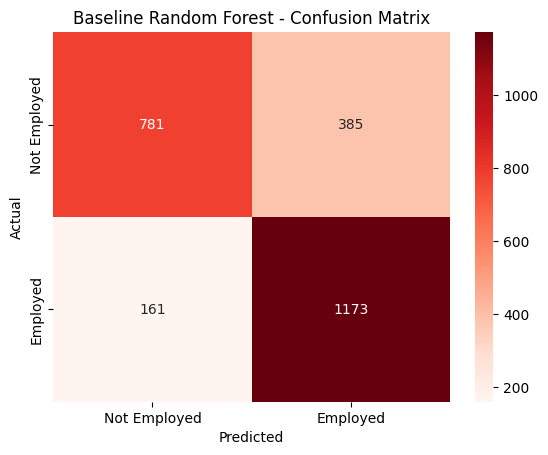

In [74]:
# Plot the confusion matrix for rfr
y_pred_proba = rfp.predict(X_test)
import seaborn as sns
threshold = 0.5
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_proba]

conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Random Forest - Confusion Matrix')
plt.show()

In [75]:
#Evaluate with Fairlearn metrics
roc_auc_score(y_test, y_pred_proba)

0.8686031126803666

In [76]:
#the model can distinguish between true and false positives well

In [77]:
def compute_error_metric(metric_value, sample_size):
    """Compute standard error of a given metric based on the assumption of
    normal distribution.

    Parameters:
    metric_value: Value of the metric
    sample_size: Number of data points associated with the metric

    Returns:
    The standard error of the metric
    """
    metric_value = metric_value / sample_size
    return (
        1.96
        * np.sqrt(metric_value * (1.0 - metric_value))
        / np.sqrt(sample_size)
    )


def false_positive_error(y_true, y_pred):
    """Compute the standard error for the false positive rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fp, tn + fp)


def false_negative_error(y_true, y_pred):
    """Compute the standard error for the false negative rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fn, fn + tp)


def balanced_accuracy_error(y_true, y_pred):
    """Compute the standard error for the balanced accuracy estimate."""
    fpr_error, fnr_error = false_positive_error(
        y_true, y_pred
    ), false_negative_error(y_true, y_pred)
    return np.sqrt(fnr_error**2 + fpr_error**2) / 2


fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "balanced_acc_error": balanced_accuracy_error,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_positive_error": false_positive_error,
    "false_negative_rate": false_negative_rate,
    "false_negative_error": false_negative_error,
}

In [78]:
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]

In [79]:
A_test = rcm.loc[X_test.index, 'Gender']
A_train = rcm.loc[X_train.index, 'Gender']
metricframe_unmitigated = MetricFrame(
    metrics=fairness_metrics,
    y_true = y_test,
    y_pred = y_pred_binary,
    sensitive_features=A_test
)

In [80]:
print(metricframe_unmitigated.by_group[metrics_to_report])


           balanced_accuracy  false_positive_rate  false_negative_rate
Gender                                                                
Man                 0.772543             0.336134             0.118780
NonBinary           0.804511             0.285714             0.105263
Woman               0.793424             0.253731             0.159420


In [81]:
print(metricframe_unmitigated.overall[metrics_to_report])


balanced_accuracy      0.774561
false_positive_rate    0.330189
false_negative_rate    0.120690
dtype: float64


In [82]:
print(metricframe_unmitigated.difference()[metrics_to_report])


balanced_accuracy      0.031969
false_positive_rate    0.082403
false_negative_rate    0.054157
dtype: float64


In [83]:
metric_error_pairs = [
    ("balanced_accuracy", "balanced_acc_error"),
    ("false_positive_rate", "false_positive_error"),
    ("false_negative_rate", "false_negative_error"),
]


def create_metricframe_w_errors(mframe, metrics_to_report, metric_error_pair):
    mframe_by_group = mframe.by_group.copy()
    for (metric_name, error_name) in metric_error_pair:
        mframe_by_group[metric_name] = mframe_by_group[metric_name].apply(
            lambda x: f"{x:.3f}"
        )
        mframe_by_group[error_name] = mframe_by_group[error_name].apply(
            lambda x: f"{x:.3f}"
        )
        mframe_by_group[metric_name] = mframe_by_group[metric_name].str.cat(
            mframe_by_group[error_name], sep="±"
        )
    return mframe_by_group[metrics_to_report]

In [84]:
create_metricframe_w_errors(
    metricframe_unmitigated, metrics_to_report, metric_error_pairs
)

metricframe_unmitigated.overall[metrics_to_report]

,0
balanced_accuracy,0.774561
false_positive_rate,0.330189
false_negative_rate,0.120690


In [85]:
y_pred_inprocess = rfp.predict(X_test)
metricframe_inprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_pred_binary,
    sensitive_features=A_test,
)
create_metricframe_w_errors(
    metricframe_inprocess, metrics_to_report, metric_error_pairs
)

,balanced_accuracy,false_positive_rate,false_negative_rate
Gender,,,
Man,0.773±0.017,0.336±0.028,0.119±0.018
NonBinary,0.805±0.108,0.286±0.167,0.105±0.138
Woman,0.793±0.068,0.254±0.104,0.159±0.086


array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='Gender'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='Gender'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='Gender'>]],
      dtype=object)

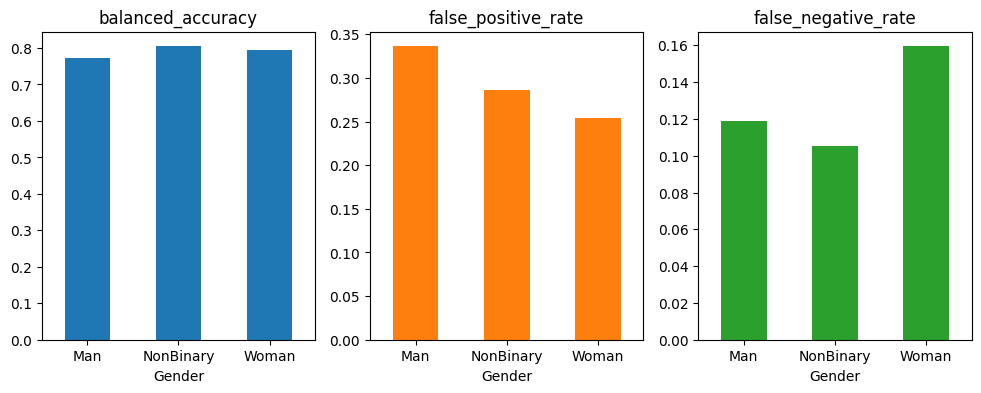

In [86]:
metricframe_inprocess.difference()[metrics_to_report]

metricframe_inprocess.overall[metrics_to_report]

metricframe_inprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)

### **Fairlearn evaluation for Gradient Boosting Regressor**


In [87]:
def create_regr_pipe(est, X):

  """ """
  regr_pipe = Pipeline(
      steps = [
      ("pp", create_proc_pipe(X)),
      ("regr", est())
      ]
  ).set_output(transform = "pandas")
  return regr_pipe
gbr = create_regr_pipe(GradientBoostingRegressor, X_train)
gbr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Under 35', 'Employment',
                                                   'YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='none',
                                                                                 strategy='constant')),
                                                                  ('cat',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Accessibility', 'EdLevel',
                                                   'Gender', 'MentalHealth',
                                                   'MainBranch', 'Country'])],
                                   verbose_feature_names_out=False)),
                ('regr', GradientBoostingRegressor())])

In [88]:
#take a look at results for GBR
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = gbr.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Score: {score}")

MSE: 0.14641624240456638
R2: 0.41167826355141046
Score: 0.4644473110767793


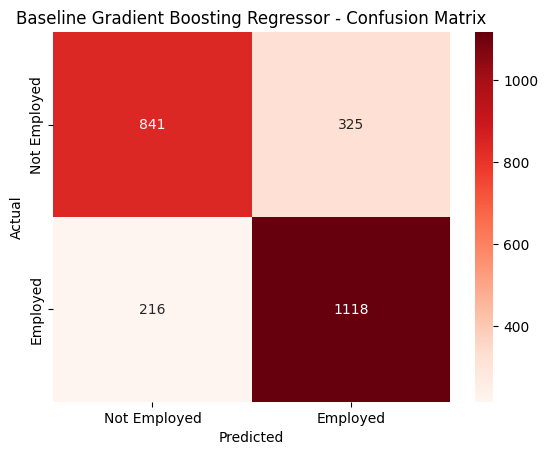

In [89]:
y_pred_proba = gbr.predict(X_test)
import seaborn as sns
threshold = 0.5
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_proba]

conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Gradient Boosting Regressor - Confusion Matrix')
plt.show()

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.8690316076952947

In [91]:
def compute_error_metric(metric_value, sample_size):
    """Compute standard error of a given metric based on the assumption of
    normal distribution.

    Parameters:
    metric_value: Value of the metric
    sample_size: Number of data points associated with the metric

    Returns:
    The standard error of the metric
    """
    metric_value = metric_value / sample_size
    return (
        1.96
        * np.sqrt(metric_value * (1.0 - metric_value))
        / np.sqrt(sample_size)
    )


def false_positive_error(y_true, y_pred):
    """Compute the standard error for the false positive rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fp, tn + fp)


def false_negative_error(y_true, y_pred):
    """Compute the standard error for the false negative rate estimate."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return compute_error_metric(fn, fn + tp)


def balanced_accuracy_error(y_true, y_pred):
    """Compute the standard error for the balanced accuracy estimate."""
    fpr_error, fnr_error = false_positive_error(
        y_true, y_pred
    ), false_negative_error(y_true, y_pred)
    return np.sqrt(fnr_error**2 + fpr_error**2) / 2


fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "balanced_acc_error": balanced_accuracy_error,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_positive_error": false_positive_error,
    "false_negative_rate": false_negative_rate,
    "false_negative_error": false_negative_error,
}

In [92]:
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]

In [93]:
A_test = rcm.loc[X_test.index, 'Gender']
A_train = rcm.loc[X_train.index, 'Gender']
metricframe_unmitigated = MetricFrame(
    metrics=fairness_metrics,
    y_true = y_test,
    y_pred = y_pred_binary,
    sensitive_features=A_test
)

In [94]:
print(metricframe_unmitigated.by_group[metrics_to_report])


           balanced_accuracy  false_positive_rate  false_negative_rate
Gender                                                                
Man                 0.777557             0.287582             0.157303
NonBinary           0.849624             0.142857             0.157895
Woman               0.779797             0.194030             0.246377


In [95]:
print(metricframe_unmitigated.overall[metrics_to_report])


balanced_accuracy      0.779675
false_positive_rate    0.278731
false_negative_rate    0.161919
dtype: float64


In [96]:
print(metricframe_unmitigated.difference()[metrics_to_report])


balanced_accuracy      0.072067
false_positive_rate    0.144725
false_negative_rate    0.089073
dtype: float64


In [97]:
metric_error_pairs = [
    ("balanced_accuracy", "balanced_acc_error"),
    ("false_positive_rate", "false_positive_error"),
    ("false_negative_rate", "false_negative_error"),
]


def create_metricframe_w_errors(mframe, metrics_to_report, metric_error_pair):
    mframe_by_group = mframe.by_group.copy()
    for (metric_name, error_name) in metric_error_pair:
        mframe_by_group[metric_name] = mframe_by_group[metric_name].apply(
            lambda x: f"{x:.3f}"
        )
        mframe_by_group[error_name] = mframe_by_group[error_name].apply(
            lambda x: f"{x:.3f}"
        )
        mframe_by_group[metric_name] = mframe_by_group[metric_name].str.cat(
            mframe_by_group[error_name], sep="±"
        )
    return mframe_by_group[metrics_to_report]

In [98]:
create_metricframe_w_errors(
    metricframe_unmitigated, metrics_to_report, metric_error_pairs
)

metricframe_unmitigated.overall[metrics_to_report]

,0
balanced_accuracy,0.779675
false_positive_rate,0.278731
false_negative_rate,0.161919


In [99]:
y_pred_inprocess = gbr.predict(X_test)
metricframe_inprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_pred_binary,
    sensitive_features=A_test,
)
create_metricframe_w_errors(
    metricframe_inprocess, metrics_to_report, metric_error_pairs
)

,balanced_accuracy,false_positive_rate,false_negative_rate
Gender,,,
Man,0.778±0.017,0.288±0.027,0.157±0.020
NonBinary,0.850±0.105,0.143±0.130,0.158±0.164
Woman,0.780±0.069,0.194±0.095,0.246±0.102


array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='Gender'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='Gender'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='Gender'>]],
      dtype=object)

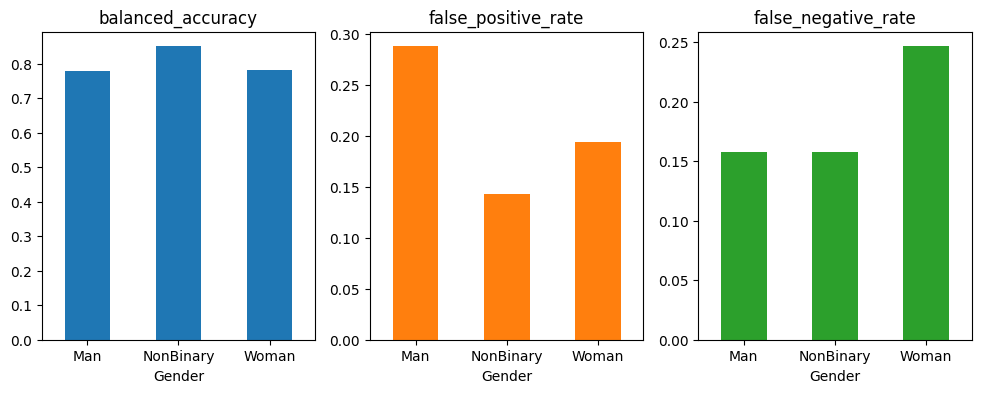

In [100]:
metricframe_inprocess.difference()[metrics_to_report]

metricframe_inprocess.overall[metrics_to_report]

metricframe_inprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)

### **Bias Mitigation**

In [101]:
rfp.fit(X_train,y_train)
estimator = rfp
postprocess_est = ThresholdOptimizer(
    estimator=estimator,
    constraints="equalized_odds",
    objective="balanced_accuracy_score",
    prefit=True,
)

In [102]:
postprocess_est.fit(X=X_train, y=y_train, sensitive_features=A_train)

postprocess_pred = postprocess_est.predict(X_test, sensitive_features=A_test)

postprocess_pred_proba = postprocess_est._pmf_predict(
    X_test, sensitive_features=A_test
)

In [103]:
def compare_metricframe_results(mframe_1, mframe_2, metrics, names):
    """Concatenate the results of two MetricFrames along a subset of metrics.

    Parameters
    ----------
    mframe_1: First MetricFrame for comparison
    mframe_2: Second MetricFrame for comparison
    metrics: The subset of metrics for comparison
    names: The names of the selected metrics

    Returns
    -------
    MetricFrame : MetricFrame
        The concatenation of the two MetricFrames, restricted to the metrics
        specified.

    """
    return pd.concat(
        [mframe_1.by_group[metrics], mframe_2.by_group[metrics]],
        keys=names,
        axis=1,
    )

In [104]:
bal_acc_postprocess = balanced_accuracy_score(y_test, postprocess_pred)
eq_odds_postprocess = equalized_odds_difference(
    y_test, postprocess_pred, sensitive_features=A_test
)

metricframe_postprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=postprocess_pred,
    sensitive_features=A_test,
)

metricframe_postprocess.overall[metrics_to_report]

metricframe_postprocess.difference()[metrics_to_report]


,0
balanced_accuracy,0.156699
false_positive_rate,0.195612
false_negative_rate,0.160946


array([[<Axes: title={'center': 'balanced_accuracy'}, xlabel='Gender'>,
        <Axes: title={'center': 'false_positive_rate'}, xlabel='Gender'>,
        <Axes: title={'center': 'false_negative_rate'}, xlabel='Gender'>]],
      dtype=object)

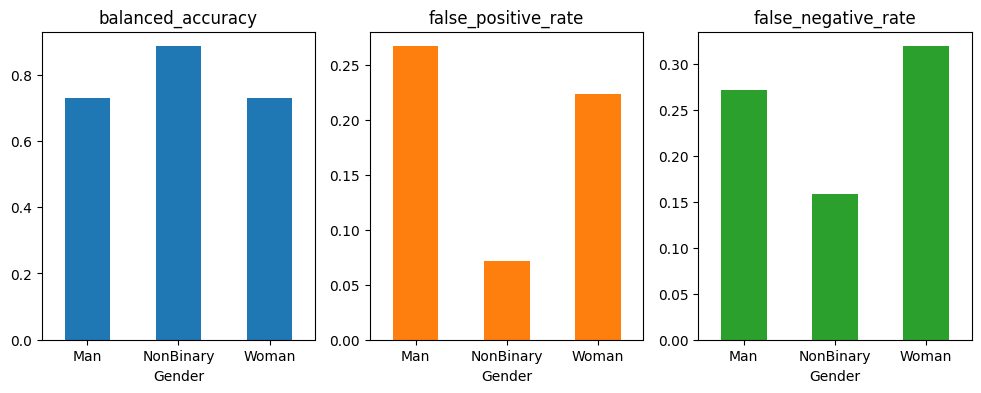

In [105]:
compare_metricframe_results(
    metricframe_unmitigated,
    metricframe_postprocess,
    metrics=metrics_to_report,
    names=["Unmitigated", "PostProcess"],
)

metricframe_postprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)

In [106]:
create_metricframe_w_errors(
    metricframe_inprocess, metrics_to_report, metric_error_pairs
)

,balanced_accuracy,false_positive_rate,false_negative_rate
Gender,,,
Man,0.778±0.017,0.288±0.027,0.157±0.020
NonBinary,0.850±0.105,0.143±0.130,0.158±0.164
Woman,0.780±0.069,0.194±0.095,0.246±0.102


### **Train on man, test on woman and vice versa**

In [107]:
#Train on man, test on woman

#First filter the dataset by gender

X_train_man = X_train[X_train["Gender"] == "Man"]
y_train_man = y_train[X_train["Gender"] == "Man"]

X_test_woman = X_test[X_test["Gender"] == "Woman"]
y_test_woman = y_test[X_test["Gender"] == "Woman"]

X_test_man = X_test[X_test["Gender"] == "Man"]
y_test_man = y_test[X_test["Gender"] == "Man"]

#Train the model on the men

rfp.fit(X_train_man, y_train_man)

#predict on women
y_pred_woman = rfp.predict(X_test_woman)
#predict on man
y_pred_man = rfp.predict(X_test_man)

#evaluate the model
mse_woman = mean_squared_error(y_test_woman, y_pred_woman)
mse_man = mean_squared_error(y_test_man, y_pred_man)
r2_woman = r2_score(y_test_woman, y_pred_woman)
r2_man = r2_score(y_test_man, y_pred_man)

print(f"MSE for women: {mse_woman}")
print(f"MSE for men: {mse_man}")
print(f"R2 for women: {r2_woman}")
print(f"R2 for men: {r2_man}")

MSE for women: 0.1353513017249886
MSE for men: 0.14849915178540882
R2 for women: 0.4584776818720767
R2 for men: 0.4025954480149381


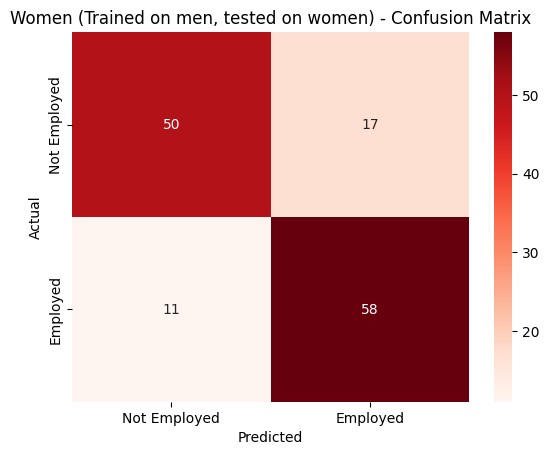

In [108]:
# Plot the confusion matrix for women
y_pred_proba = rfp.predict(X_test_woman)

threshold = 0.5
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_proba]

conf_mat = confusion_matrix(y_test_woman, y_pred_binary)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Women (Trained on men, tested on women) - Confusion Matrix')
plt.show()

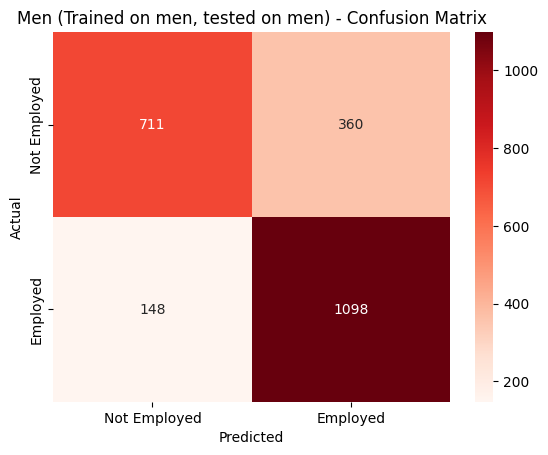

In [109]:
# Plot the confusion matrix for women
y_pred_proba = rfp.predict(X_test_man)

threshold = 0.5
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_proba]

conf_mat = confusion_matrix(y_test_man, y_pred_binary)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Men (Trained on men, tested on men) - Confusion Matrix')
plt.show()

In [110]:
#Train on woman, test on man
X_train_woman = X_train[X_train["Gender"] == "Woman"]
y_train_woman = y_train[X_train["Gender"] == "Woman"]

#train the model on woman
rfp.fit(X_train_woman, y_train_woman)

#predict on woman
y_pred_woman = rfp.predict(X_test_woman)
#predict on man
y_pred_man = rfp.predict(X_test_man)

#evaluate the model

mse_woman = mean_squared_error(y_test_woman, y_pred_woman)
mse_man = mean_squared_error(y_test_man, y_pred_man)
r2_woman = r2_score(y_test_woman, y_pred_woman)
r2_man = r2_score(y_test_man, y_pred_man)

print(f"MSE for women: {mse_woman}")
print(f"MSE for men: {mse_man}")
print(f"R2 for women: {r2_woman}")
print(f"R2 for men: {r2_man}")

MSE for women: 0.14481802259314983
MSE for men: 0.15788868615599713
R2 for women: 0.4206026074231237
R2 for men: 0.3648218277176616


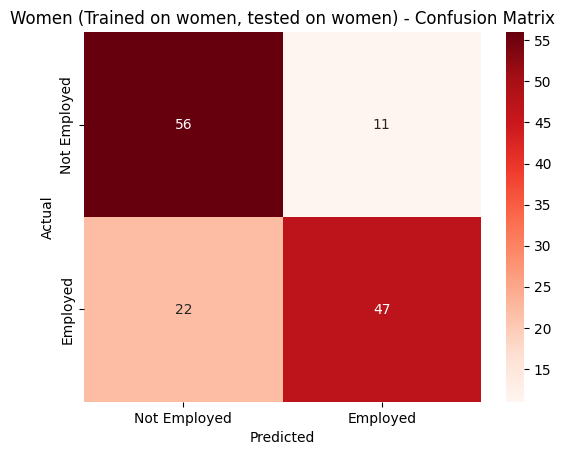

In [111]:
# Plot the confusion matrix for women
y_pred_proba = rfp.predict(X_test_woman)

threshold = 0.5
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_proba]

conf_mat = confusion_matrix(y_test_woman, y_pred_binary)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Women (Trained on women, tested on women) - Confusion Matrix')
plt.show()

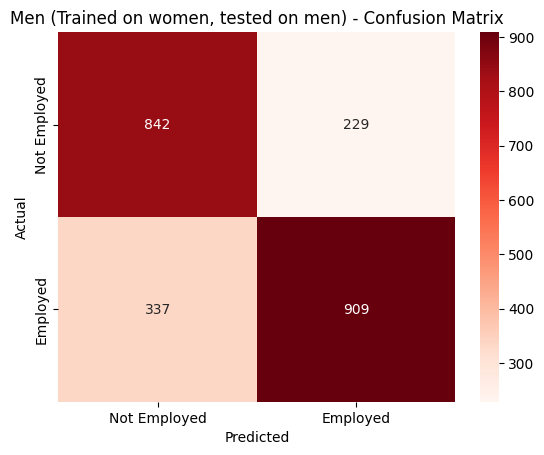

In [112]:
# Plot the confusion matrix for women
y_pred_proba = rfp.predict(X_test_man)

threshold = 0.5
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred_proba]

conf_mat = confusion_matrix(y_test_man, y_pred_binary)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Men (Trained on women, tested on men) - Confusion Matrix')
plt.show()

Mitigate Bias

In [113]:
postprocess_est = ThresholdOptimizer(
    estimator=estimator,
    constraints="equalized_odds",  # Optimize FPR and FNR simultaneously
    objective="balanced_accuracy_score",
    prefit=True,
    predict_method="predict_proba",
)